# Structure of your Notebook

- Introduction: describe which dataset and variables you selected and why
- Data cleaning: describe any data cleaning steps
- Exploratory data analysis: present relevant grahs and tables with respect to your problem
- Predictive model (next week)
- Evaluation (next week)
- Conclusion (next week)


Introduction: 
- I picked the Dataset "Gender Recognition by Voice" to predict the value female or male
Speech analysis per gender can be defined as follows: The voiced speech of a typical adult male will have a fundamental frequency from 85 to 155 Hz, and that of a typical adult female from 165 to 255 Hz. Thus, the fundamental frequency of most speech falls below the bottom of the voice frequency band as defined above. However, enough of the harmonic series will be present for the missing fundamental to create the impression of hearing the fundamental tone. (https://en.wikipedia.org/wiki/Voice_frequency#Fundamental_frequency) 

The Kaggle Dataset included an analyzed frequency range of 0hz-280hz (human vocal range).
meanfreq: mean frequency (in kHz) and meanfun: average of fundamental frequency

- For this the variables: 

meanfreq: mean frequency (in kHz), meanfun: average of fundamental frequency measured across acoustic signal


In [18]:
import pandas as pd
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
df = pd.read_csv('voice.csv')
df.head(10)

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male
5,0.132786,0.079557,0.119090,0.067958,0.209592,0.141634,1.932562,8.308895,0.963181,0.738307,...,0.132786,0.110132,0.017112,0.253968,0.298222,0.007812,2.726562,2.718750,0.125160,male
6,0.150762,0.074463,0.160106,0.092899,0.205718,0.112819,1.530643,5.987498,0.967573,0.762638,...,0.150762,0.105945,0.026230,0.266667,0.479620,0.007812,5.312500,5.304688,0.123992,male
7,0.160514,0.076767,0.144337,0.110532,0.231962,0.121430,1.397156,4.766611,0.959255,0.719858,...,0.160514,0.093052,0.017758,0.144144,0.301339,0.007812,0.539062,0.531250,0.283937,male
8,0.142239,0.078018,0.138587,0.088206,0.208587,0.120381,1.099746,4.070284,0.970723,0.770992,...,0.142239,0.096729,0.017957,0.250000,0.336476,0.007812,2.164062,2.156250,0.148272,male
9,0.134329,0.080350,0.121451,0.075580,0.201957,0.126377,1.190368,4.787310,0.975246,0.804505,...,0.134329,0.105881,0.019300,0.262295,0.340365,0.015625,4.695312,4.679688,0.089920,male


Checking the information of the dataset to see if there are null values

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   meanfreq  3168 non-null   float64
 1   sd        3168 non-null   float64
 2   median    3168 non-null   float64
 3   Q25       3168 non-null   float64
 4   Q75       3168 non-null   float64
 5   IQR       3168 non-null   float64
 6   skew      3168 non-null   float64
 7   kurt      3168 non-null   float64
 8   sp.ent    3168 non-null   float64
 9   sfm       3168 non-null   float64
 10  mode      3168 non-null   float64
 11  centroid  3168 non-null   float64
 12  meanfun   3168 non-null   float64
 13  minfun    3168 non-null   float64
 14  maxfun    3168 non-null   float64
 15  meandom   3168 non-null   float64
 16  mindom    3168 non-null   float64
 17  maxdom    3168 non-null   float64
 18  dfrange   3168 non-null   float64
 19  modindx   3168 non-null   float64
 20  label     3168 non-null   obje

Checking mulitple linear regression to see which variables correlate strongly with each other.

In [9]:
# cleaning unrealistic weights 
df1 = df[["meanfreq", "sd", "meanfun", "meandom", "maxdom", "label"]]
# cleaning unrealistic height 
df1.head()

,meanfreq,sd,meanfun,meandom,maxdom,label
0,0.059781,0.064241,0.084279,0.007812,0.007812,male
1,0.066009,0.067310,0.107937,0.009014,0.054688,male
2,0.077316,0.083829,0.098706,0.007990,0.015625,male
3,0.151228,0.072111,0.088965,0.201497,0.562500,male
4,0.135120,0.079146,0.106398,0.712812,5.484375,male


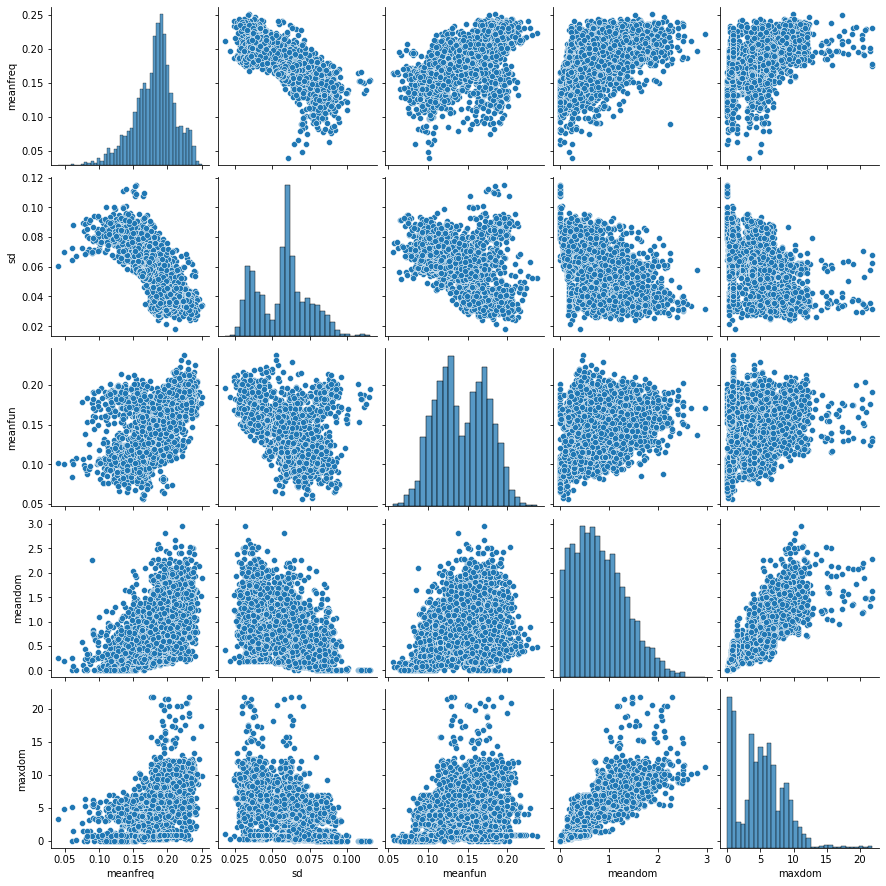

In [10]:
sns.pairplot(df1)
plt.show()

There are a few correlations we can inspect. For this case i decided to analyse meanfreq and meanfun

In [11]:
df1['meanfreq'].value_counts()

0.212190    2
0.213732    2
0.228903    1
0.100399    1
0.160155    1
           ..
0.173241    1
0.188305    1
0.190236    1
0.211934    1
0.160468    1
Name: meanfreq, Length: 3166, dtype: int64

In [12]:
df1['meanfun'].value_counts()

0.133667    2
0.139942    2
0.165075    1
0.110260    1
0.107725    1
           ..
0.159126    1
0.165314    1
0.181085    1
0.183937    1
0.076996    1
Name: meanfun, Length: 3166, dtype: int64

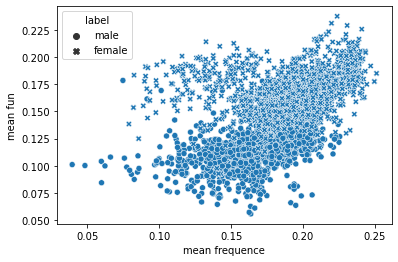

In [13]:
sns.scatterplot(x='meanfreq', y='meanfun', style='label', data=df1)
plt.xlabel('mean frequence')
plt.ylabel('mean fun')
plt.show()

We can see that female recordings are rather at a higher mean frequence than men, also the average of fundamental frequency measured across acoustic signal is higher for female respondents.

In [30]:
km = KMeans(n_clusters=5) #create a new k-means model with 3 clusters
X = df[['meanfreq','meanfun']] #get the X variables from the dataframe
km = km.fit(X) #calculate the cluster centers
df['cluster'] = km.predict(X) #predict the clusters of each observation and store in the dataframe
df.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label,cluster
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male,0
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male,0
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male,0
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male,0
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male,0


In [31]:
df['cluster'].value_counts() 

3    976
2    822
0    682
1    496
4    192
Name: cluster, dtype: int64

We create a new k-means algorithm with 3 clusters, which is big enough to capture differnce of fundamental and frequency. Afterwards it is checked how big the clusters are and show them in a scatterplot.

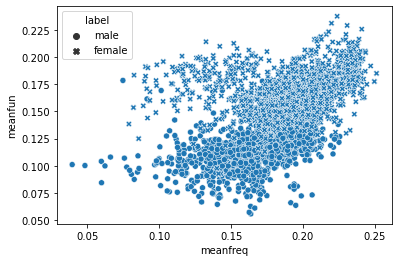

In [29]:
sns.scatterplot(x='meanfreq', y='meanfun', style='label', data=df1)
plt.xlabel('meanfreq')
plt.ylabel('meanfun')
plt.show()

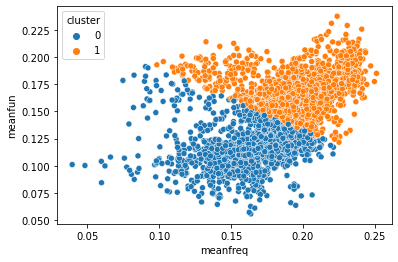

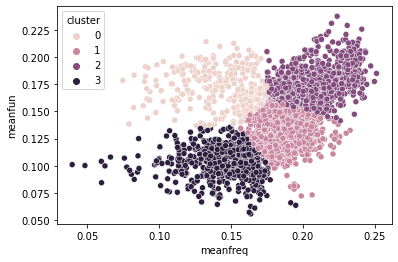

In [32]:
size = [2,4]
for n in size:
    km = KMeans(n_clusters=n) #create a new k-means model with 3 clusters
    km = km.fit(X) #calculate the cluster centers
    df['cluster'] = km.predict(X) #predict the clusters of each observation and store in the dataframe
    sns.scatterplot(x='meanfreq', y='meanfun', hue='cluster', data=df)
    plt.xlabel('meanfreq')
    plt.ylabel('meanfun')
    plt.show()

The clusters show that 4 clusters are more accurate than 2. By counting the values for the clusters, it is visible that there are 4 major clusters. 